# Задача понижения размерности
## Выделение признаков (feature extraction)

## PCA - метод главных компонент
Новые признаки создаются на основе линейных преобразований значений исходных признаков

### Пример непосредственных вычислений

Для умножения матриц используется метод dot

 https://numpy.org/doc/stable/reference/generated/numpy.matrix.dot.html

Для вычисления собственных значений и собственных векторов функция eig ( eigen [igen] - собственное)

 https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [1]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

# исходная матрица значений признаков, количество признаков = 2
A = array([[1, 2], [3, 4], [5, 6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [2]:
# средние значения в каждом столбце
M = mean(A.T, axis=1)
print(M)

[3. 4.]


In [3]:
# центрирование данных (значений признаков)
C = A - M
print(C)

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


После центрирования уже видно, что можно оставить **один** признак!
В полученной матрице одинаковые значения в столбцах!

In [4]:
# вычисление матрицы ковариаций
V = cov(C.T)
print(V)

[[4. 4.]
 [4. 4.]]


Находим **собственные вектора и собственные значения**. Здесь их по 2. Но если больше, то оставляем нужное число, соответствующих наибольшим собственным значениям.

In [5]:
# eigendecomposition - нахождение собственных векторов и собственных значений V
values, vectors = eig(V)
print("Shape and eigenvectors:")
print(vectors.shape)
print(vectors)
print('---------------------------')
print("Shape and eigenvalues:")
print(values.shape)
print(values)

Shape and eigenvectors:
(2, 2)
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
---------------------------
Shape and eigenvalues:
(2,)
[8. 0.]


Переход к новым признакам - находим значения исходной матрицы в новом базисе, который состоит из найденных собственных векторов

In [6]:
# проекция исходной (центрированной) матрицы на базис из собственных векторов
P = vectors.T.dot(C.T)
print(P.T)

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


Обратите внимание - зачем нужно транспонировать матрицу vectors ⚡

In [7]:
vectors.dot(C.T)

array([[ 0.        ,  0.        ,  0.        ],
       [-2.82842712,  0.        ,  2.82842712]])

Похоже, что можно оставить один признак!

## Метод РСА из библиотеки
Используется библиотека sklearn для работы с теми же данными, что и выше.

In [8]:
from sklearn.decomposition import PCA

# создание PCA instance для 2 собственных значений и векторов
pca = PCA(2)
# обучение на матрице А
pca.fit(A)
# собственные значения и вектора
print(pca.components_)
print(pca.explained_variance_)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[8. 0.]


Обратите внимание на то, как назван атрибут - explained_variance - дисперсия нового признака. Понятно, что второй (дисперсия=0) - лишний

In [9]:
# преобразование (проекция) исходной матрицы
B = pca.transform(A)
print(B)

[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


Получили аналогичный результат (см. вычисления выше)

Можно проверить, какая доля дисперсии признаков приходится на каждый из двух признаков:

In [10]:
print(pca.explained_variance_ratio_)

[1. 0.]


# Линейный дискриминантный анализ (LDA)

 LDA будет применен для учебного датасета, предназначенного для решения задачи классификации

Исходные данные - напрямую указаны 6 пар значений признаков и соответствующие каждой паре метки классов

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = array([1, 1, 1, 2, 2, 2])
print(X.shape, y.shape)

(6, 2) (6,)


Создание и обучение модели

In [12]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

Прогноз для новой пары признаков

In [ ]:
print(lda.predict([[-0.8, -1]]))

[1]


Уменьшение размерности до одного признака и получение его значений с помощью методы transform:

In [13]:
print(lda.transform(X))

[[-1.73205081]
 [-1.73205081]
 [-3.46410162]
 [ 1.73205081]
 [ 1.73205081]
 [ 3.46410162]]


## Метод t-SNE

Метод t-SNE проиллюстрируем на примере визуализации кластеров

In [14]:
from sklearn.manifold import TSNE
# Заданы точки в 3D
X = array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])

# Перейдем от 3D к 2D точкам
X_ = TSNE(n_components=2, perplexity=3, init = 'pca').fit_transform(X)
print(X_)

[[ -96.35734     -7.72698  ]
 [-106.21599     18.228382 ]
 [ -70.483025     2.3435585]
 [ -80.36847     28.239033 ]]


Text(0, 0.5, 'Component 2')

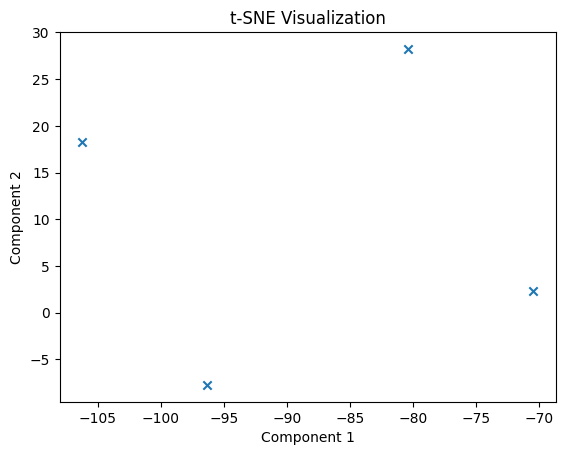

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_[:, 0], X_[:, 1], marker='x')
plt.title('t-SNE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

### Еще один пример

In [17]:
import numpy as np

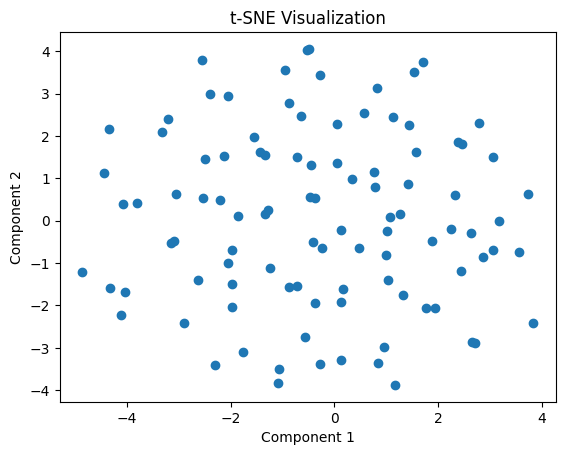

In [18]:
# Генерация случайных данных
X = np.random.rand(100, 50)  # 100 точек в 50-мерном пространстве

# Применение t-SNE
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X)

# Визуализация
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()